In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os

In [6]:
! ls ../../results/CIFAR10/vit_hf_md/svhn_affineV0_lgv/benchmark_0

advsample_E_0.pkl      advsample_xlast_0.pkl
advsample_l_E_0.pkl    advsample_z_0.pkl
advsample_l_z_0.pkl    auc_0.txt
advsample_score_0.pkl  cifar_vit_hf_md_svhn_affineV0_lgv.yml
advsample_x_0.pkl


In [35]:
d = {}
l_algo = ['lgv', 'mh', 'random', 'randomwalk']
l_manifold = ['affineV0', 'pgstylegan2_z64']
# l_manifold = ['affineV0',]
l_model = ['oe', 'prood', 'vit_hf_md']


for m in l_model:
    d[m] = {}
    for manifold in l_manifold:
        d[m][manifold] = {}
        for algo in l_algo:
            d[m][manifold][algo] = {}
            traj = []
            for i in range(5):
                traj.append(torch.load(f'../../results/CIFAR10/{m}/svhn_{manifold}_{algo}/benchmark_{i}/advsample_l_E_0.pkl'))
            traj = torch.stack(traj)

            traj_mean = torch.cummin(traj, dim=1).values.mean(dim=2).mean(dim=0)
            traj_max = torch.cummin(traj, dim=1).values.mean(dim=2).max(dim=0).values
            traj_min = torch.cummin(traj, dim=1).values.mean(dim=2).min(dim=0).values
            
            d[m][manifold][algo]['mean'] = traj_mean
            d[m][manifold][algo]['max'] = traj_max
            d[m][manifold][algo]['min'] = traj_min

In [15]:
plt.rcParams.update({'font.size': 14})
import seaborn as sns

pal = sns.color_palette('Dark2')
l_C = pal.as_hex()
print(pal.as_hex())

In [22]:
l_algo_display = ['Langevin', 'MH', 'Rand', 'RandWalk']
l_model_display = ['OE', 'ProoD', 'ViT']
l_manifold_display = ['Affine', 'GAN']

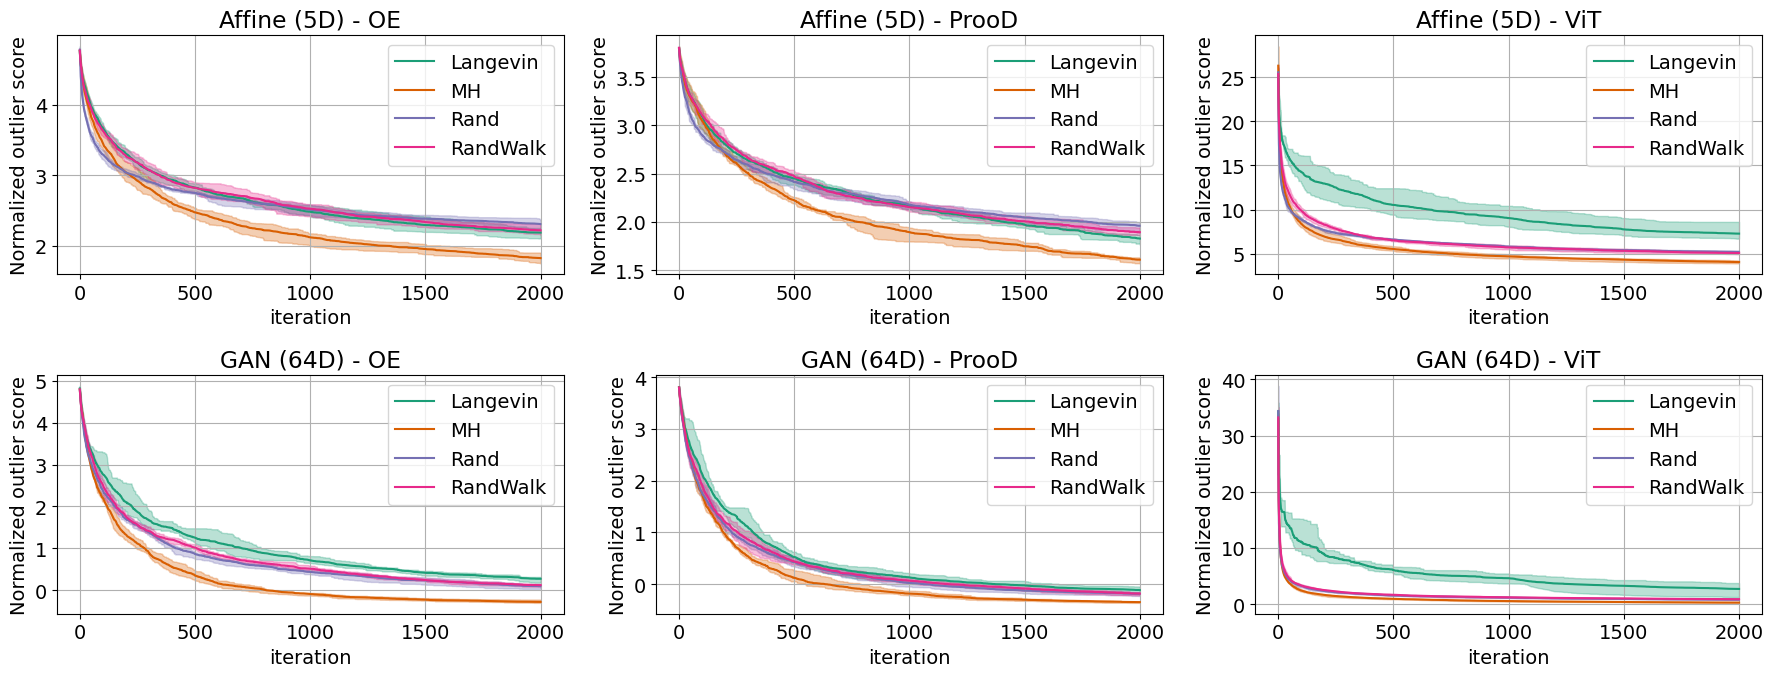

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
for i_detector, (det, disp_det) in enumerate(zip(l_model, l_model_display)):
    for i_manifold, (manifold, disp_manifold) in enumerate(zip(l_manifold, l_manifold_display)):
        case = d[det][manifold]
        dim = '5D' if manifold == 'affineV0' else '64D'
        for i, (algo, disp_algo) in enumerate(zip(l_algo, l_algo_display)):
            data = case[algo]
            
            axs[i_manifold,i_detector].fill_between(range(len(data['mean'])), y1=data['max'].numpy(), y2=data['min'].numpy(), color=l_C[i], alpha=0.3)
            axs[i_manifold,i_detector].plot(range(len(data['mean'])), data['mean'], color=l_C[i], label=disp_algo)
            axs[i_manifold,i_detector].legend()
            axs[i_manifold,i_detector].set_xlabel('iteration')
            axs[i_manifold,i_detector].set_ylabel('Normalized outlier score')
            axs[i_manifold,i_detector].grid(visible=True)
        axs[i_manifold,i_detector].set_title(f'{disp_manifold} ({dim}) - {disp_det}')
plt.tight_layout()
plt.savefig('optimization_benchmark.pdf', dpi=300, bbox_inches='tight')

In [48]:
d = {}
# l_algo = ['lgv', 'mh', 'random', 'randomwalk', 'grad']
l_algo = ['lgv', 'mh', 'randomwalk', ]
l_manifold = ['affineV0', 'pgstylegan2_z64']
# l_manifold = ['affineV0',]
l_model = ['oe', 'prood', 'vit_hf_md']


for m in l_model:
    d[m] = {}
    for manifold in l_manifold:
        d[m][manifold] = {}
        for algo in l_algo:
            d[m][manifold][algo] = {}
            traj = []
            for i in range(5):
                # traj.append(torch.load(f'../../results/CIFAR10/{m}/svhn_{manifold}_{algo}/benchmark_{i}/advsample_l_E_0.pkl'))
                d_sample = torch.load(f'result/{algo}_{m}_{manifold}_{i}.pkl')
                traj.append(d_sample['l_E'])
            traj = torch.stack(traj)

            traj_mean = torch.cummin(traj, dim=1).values.mean(dim=2).mean(dim=0)
            traj_max = torch.cummin(traj, dim=1).values.mean(dim=2).max(dim=0).values
            traj_min = torch.cummin(traj, dim=1).values.mean(dim=2).min(dim=0).values
            
            d[m][manifold][algo]['mean'] = traj_mean
            d[m][manifold][algo]['max'] = traj_max
            d[m][manifold][algo]['min'] = traj_min

In [49]:
# l_algo_display = ['Langevin', 'MH', 'Rand', 'RandWalk', 'GD']
l_algo_display = ['Langevin', 'MH',  'RandWalk',]
l_model_display = ['OE', 'ProoD', 'ViT']
l_manifold_display = ['Affine', 'GAN']

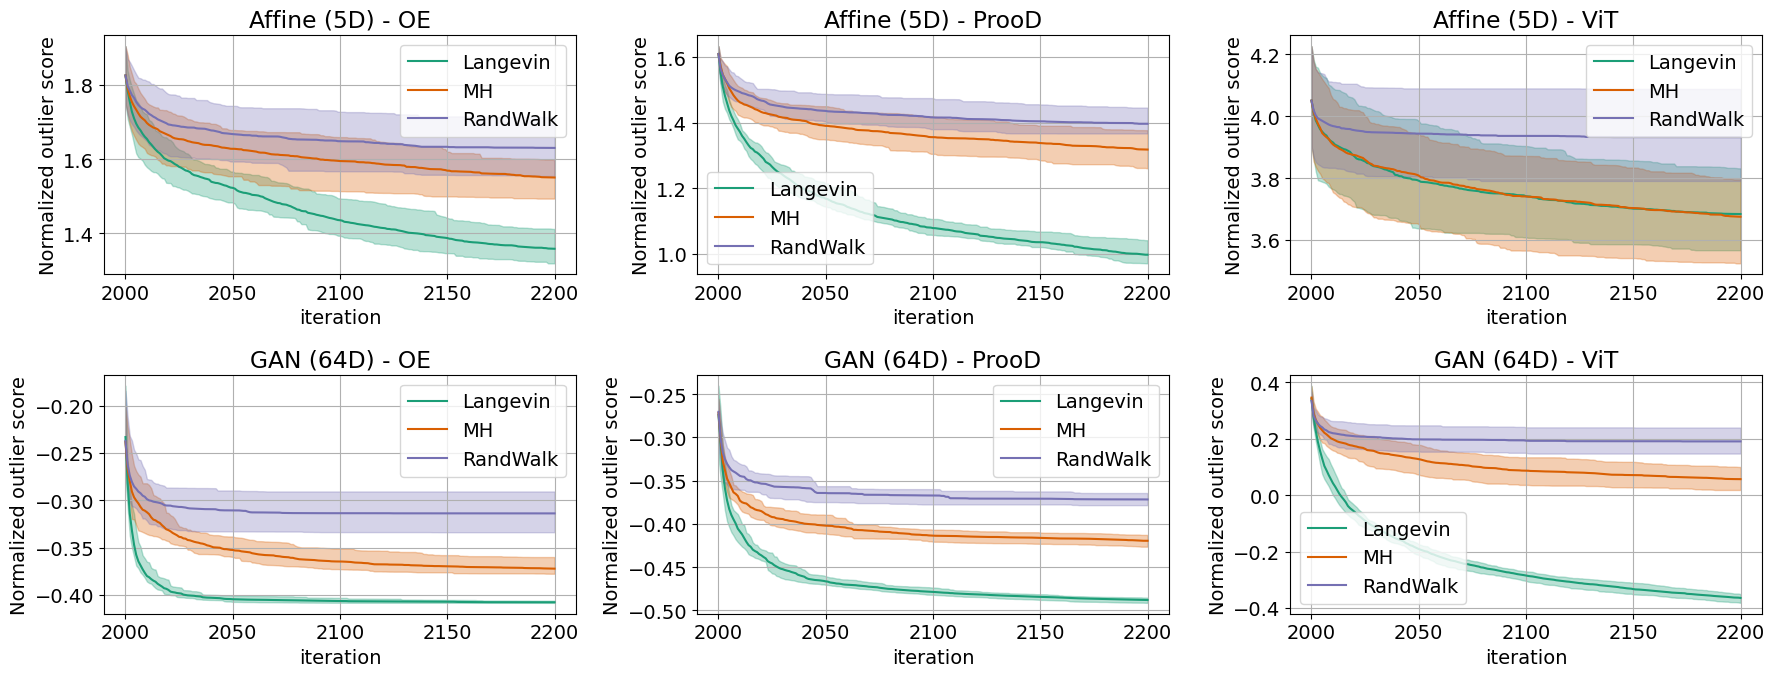

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
for i_detector, (det, disp_det) in enumerate(zip(l_model, l_model_display)):
    for i_manifold, (manifold, disp_manifold) in enumerate(zip(l_manifold, l_manifold_display)):
        case = d[det][manifold]
        dim = '5D' if manifold == 'affineV0' else '64D'
        for i, (algo, disp_algo) in enumerate(zip(l_algo, l_algo_display)):
            data = case[algo]
            
            axs[i_manifold,i_detector].fill_between(range(2000,2000+len(data['mean'])), y1=data['max'].numpy(), y2=data['min'].numpy(), color=l_C[i], alpha=0.3)
            axs[i_manifold,i_detector].plot(range(2000,2000+len(data['mean'])), data['mean'], color=l_C[i], label=disp_algo)
            axs[i_manifold,i_detector].legend()
            axs[i_manifold,i_detector].set_xlabel('iteration')
            axs[i_manifold,i_detector].set_ylabel('Normalized outlier score')
            axs[i_manifold,i_detector].grid(visible=True)
        axs[i_manifold,i_detector].set_title(f'{disp_manifold} ({dim}) - {disp_det}')
plt.tight_layout()
plt.savefig('optimization_benchmark_after.pdf', dpi=300, bbox_inches='tight')